In [76]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, numpy, random
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        # define the network
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )

        # define the loss function
        self.loss_function = nn.BCELoss()

        # define the optimiser
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.01)

        # define the counter
        self.count = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        self.count += 1

        if self.count % 10 == 0:
            self.progress.append(loss.item())

            if self.count % 1000 == 0:
                print(f"counter ={self.count}, loss={loss.item()} ")
        

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

In [78]:
from torch.utils.data import Dataset
from matplotlib import pyplot as plt

class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)

    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1

        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28,28)
        plt.title('label = ' + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation='none', cmap='Blues')

    



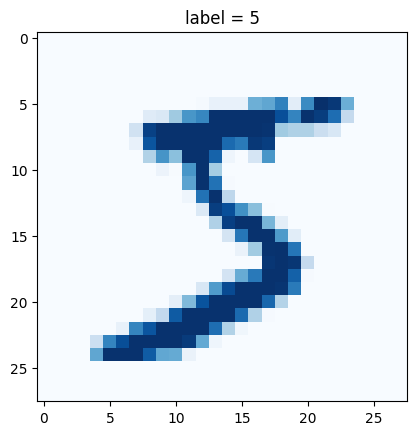

In [79]:
# 链接：https://pan.baidu.com/s/1V0WzUYvObLRU2wv8fYEwAg
# 提取码：z9bh

#mnist_dataset = MnistDataset(csv_file='../torch_mnist/mnist_train_100.csv')
mnist_dataset = MnistDataset(csv_file='../torch_mnist/mnist_train.csv')

mnist_dataset.plot_image(0)

In [93]:
def generate_random(size=4):
    return torch.rand(size)

generate_random()

def generate_noise(size=4):
    return torch.randn(size)

In [81]:
D = Discriminator()

for label , image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1]))
    D.train(generate_random(784), torch.FloatTensor([0.0])) 

counter =1000, loss=3.1412142561748624e-05 
counter =2000, loss=1.0073235898744315e-05 
counter =3000, loss=5.364432581700385e-06 
counter =4000, loss=1.7285361764152185e-06 
counter =5000, loss=1.1920935776288388e-06 
counter =6000, loss=5.960466182841628e-07 
counter =7000, loss=3.576279254957626e-07 
counter =8000, loss=2.3841860752327193e-07 
counter =9000, loss=1.1920928955078125e-07 
counter =10000, loss=5.960464477539063e-08 
counter =11000, loss=5.960464477539063e-08 
counter =12000, loss=0.0 
counter =13000, loss=0.0 
counter =14000, loss=0.0 
counter =15000, loss=0.0 
counter =16000, loss=0.0 
counter =17000, loss=0.0 
counter =18000, loss=0.0 
counter =19000, loss=0.0 
counter =20000, loss=0.0 
counter =21000, loss=0.0 
counter =22000, loss=0.0 
counter =23000, loss=0.0 
counter =24000, loss=0.0 
counter =25000, loss=0.0 
counter =26000, loss=0.0 
counter =27000, loss=0.0 
counter =28000, loss=0.0 
counter =29000, loss=0.0 
counter =30000, loss=0.0 
counter =31000, loss=0.0 

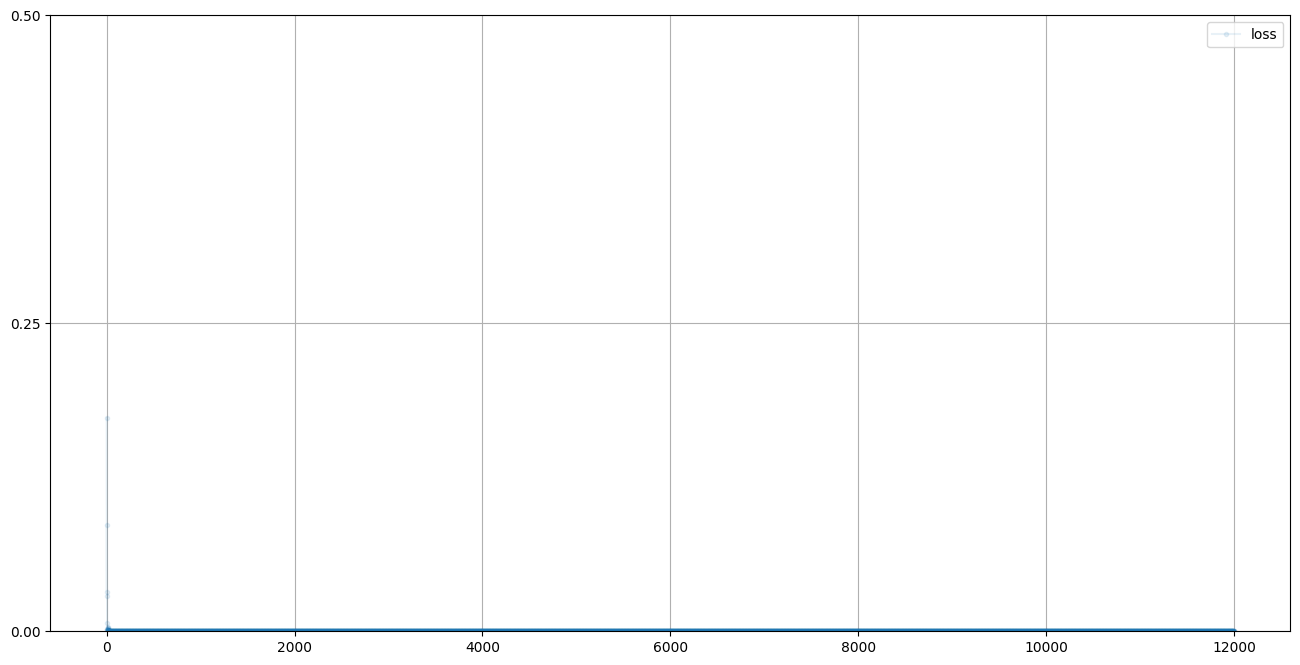

In [82]:
D.plot_progress()

In [83]:
# Test the discriminator
for i in range(10):
    print(D.forward(generate_random(784)).item())

for i in range(10):
    image_data_tensor = mnist_dataset[random.randint(0, len(mnist_dataset))][1]
    print(D.forward(image_data_tensor).item())

7.758925473682135e-14
1.3219691996895627e-13
2.645281454820292e-13
1.4084532964833002e-13
1.501007570190241e-13
1.240390846675779e-13
1.220052162596852e-13
1.0003978168863364e-13
1.1395956877810476e-13
2.379537539232146e-13
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [88]:
class Generator(nn.Module):

    def __init__(self):
        super().__init__()

        # define the network
        self.model = nn.Sequential(
            nn.Linear(100, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )

        # define the optimiser
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.01)

        # define the counter
        self.count = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_outputs = self.forward(inputs)

        d_outputs = D.forward(g_outputs)

        loss = D.loss_function(d_outputs, targets)

        self.count += 1

        if self.count % 10 == 0:
            self.progress.append(loss.item())

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.8))


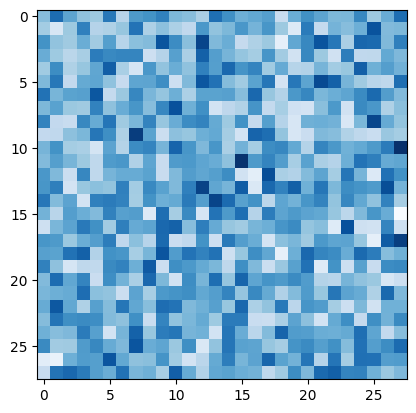

In [89]:
G = Generator()
output = G.forward(generate_random(100))
img = output.detach().numpy().reshape(28,28)
plt.imshow(img, interpolation='none', cmap='Blues')

In [98]:
D = Discriminator()
G = Generator()
epchos = 4
for i in range(epchos):
    for label, image_data_tensor, target_tensor in mnist_dataset:
        D.train(image_data_tensor, torch.FloatTensor([1.0]))
        D.train(G.forward(generate_noise(100)).detach(), torch.FloatTensor([0.0]))
        G.train(D, generate_noise(100), torch.FloatTensor([1.0]))

counter =1000, loss=0.02576146274805069 
counter =2000, loss=0.00031732587376609445 
counter =3000, loss=0.2729068100452423 
counter =4000, loss=0.00962764397263527 
counter =5000, loss=0.011017713695764542 
counter =6000, loss=0.005531261675059795 
counter =7000, loss=0.009960983879864216 
counter =8000, loss=0.7400817275047302 
counter =9000, loss=0.0252221766859293 
counter =10000, loss=0.05810220539569855 
counter =11000, loss=0.0037673059850931168 
counter =12000, loss=0.00040467819781042635 
counter =13000, loss=0.002012906363233924 
counter =14000, loss=0.14670291543006897 
counter =15000, loss=0.0477399118244648 
counter =16000, loss=0.006417137570679188 
counter =17000, loss=0.1665915846824646 
counter =18000, loss=0.001790217706002295 


KeyboardInterrupt: 

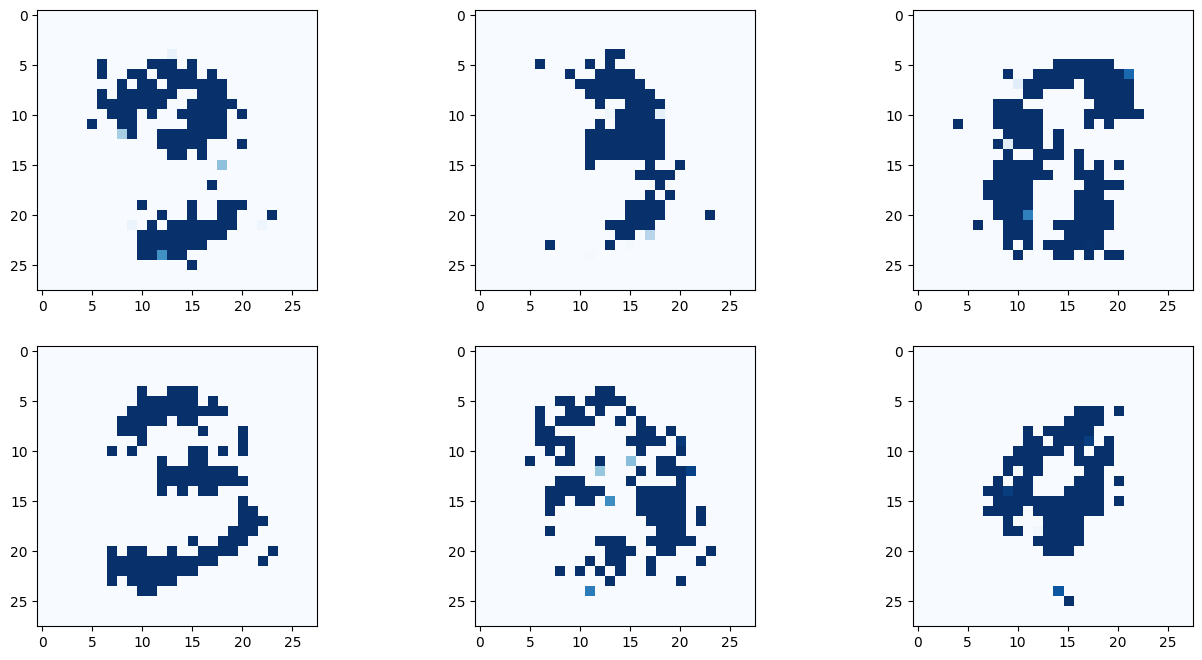

In [97]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))
for i in range(2):
    for j in range(3):
        axarr[i, j].imshow(G.forward(generate_noise(100)).detach().numpy().reshape(28, 28), cmap='Blues')

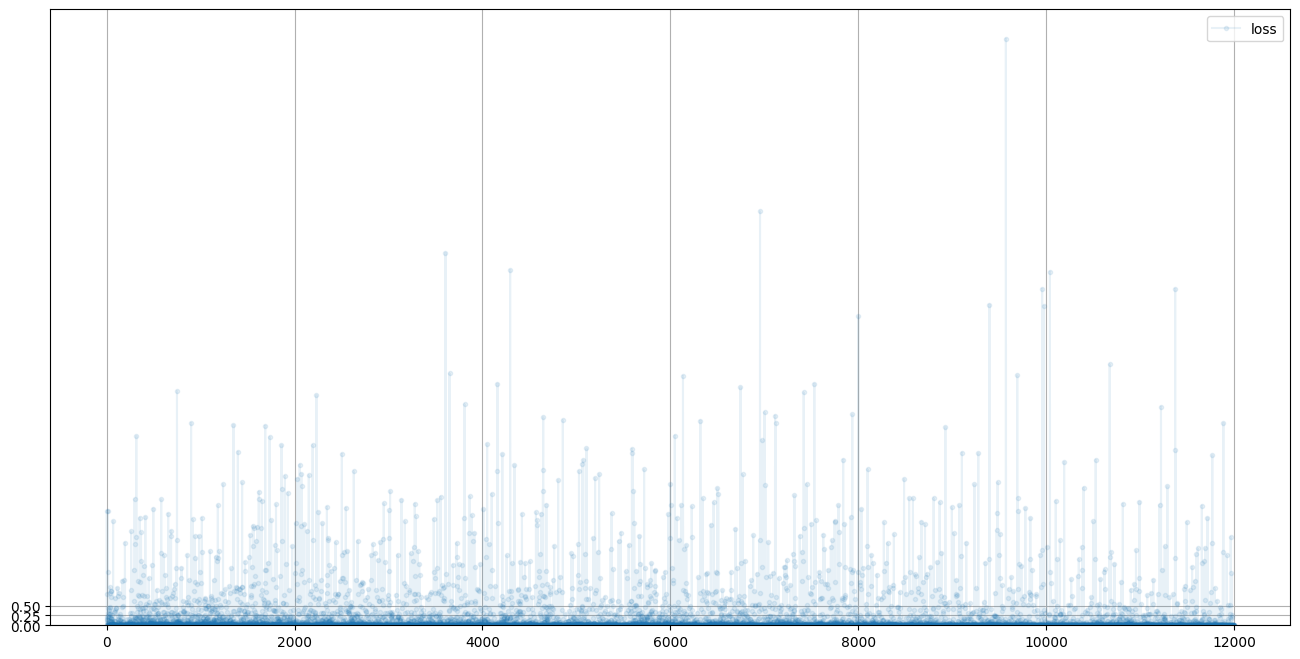

In [95]:
D.plot_progress()

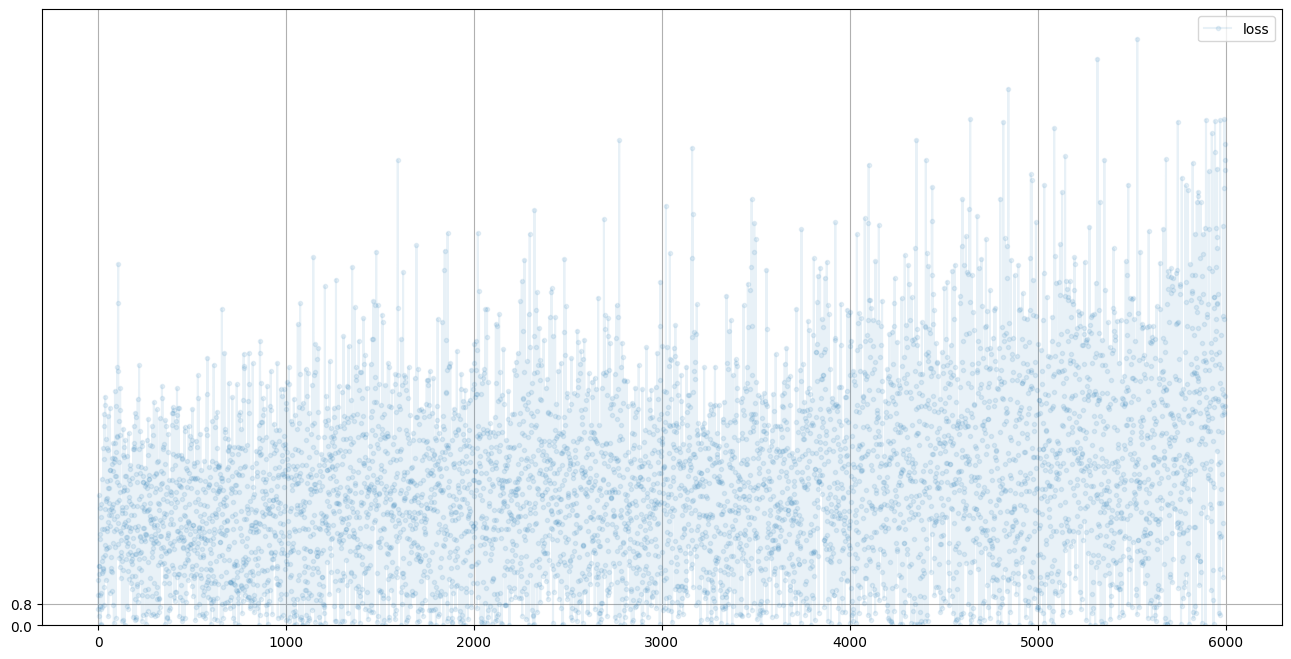

In [96]:
G.plot_progress()